In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats 
import scipy.stats as stats

In [2]:
df = pd.read_csv(r'D:\Dig\00-imarticus\udemy_data\Two+Machines.csv')
df

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1
...,...,...
195,152.05,Machine 2
196,151.41,Machine 2
197,153.76,Machine 2
198,150.75,Machine 2


In [3]:
df.describe()

,Volume
count,200.000000
mean,151.538350
std,2.180823
min,145.440000
25%,150.015000
50%,151.515000
75%,153.110000
max,156.230000


In [4]:
df['Machine'].value_counts()

Machine 2    100
Machine 1    100
Name: Machine, dtype: int64

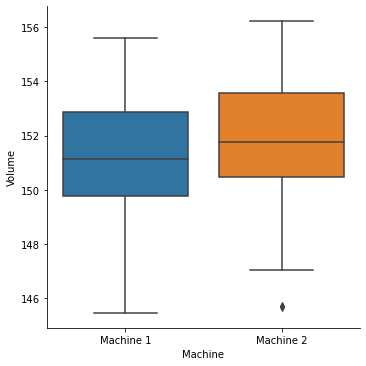

In [5]:
sns.catplot(data=df, x='Machine', y='Volume', kind='box')

Machine One Data Graph


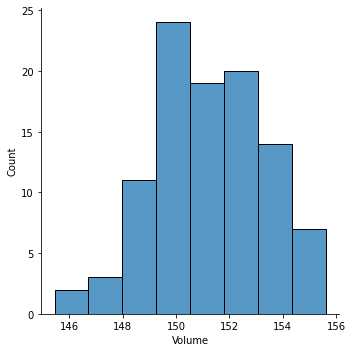

In [6]:
mc1 = df[df['Machine'] == 'Machine 1']

print("Machine One Data Graph")
sns.displot(data=mc1, x='Volume')

Machine Two Data Graph


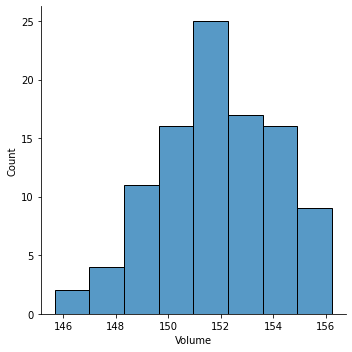

In [7]:
mc2 = df[df['Machine'] == 'Machine 2']

print("Machine Two Data Graph")
sns.displot(data=mc2, x='Volume')

In [8]:
# Machine 1 Description

mc1.describe().T

,count,mean,std,min,25%,50%,75%,max
Volume,100.0,151.2039,2.113651,145.44,149.755,151.15,152.8525,155.61


In [9]:
# Machine 1 Description

mc2.describe().T

,count,mean,std,min,25%,50%,75%,max
Volume,100.0,151.8728,2.206019,145.68,150.4875,151.78,153.5875,156.23


# Applying 2 Sample Z-Test On Perfume Example

<br>

#### Q.) Does both the machines are producing perfumes in equal volumns or not?

In [11]:
Z_cal, P_value = weightstats.ztest(x1=mc1['Volume'], x2=mc2['Volume'])

print(f"Z-Calculated: {Z_cal}")
print(f"P-Value: {P_value}")

Z-Calculated: -2.189406040190184
P-Value: 0.028567341032618248


Now Compare P-Value with Alpha i.e 0.05.

- We notice that P-Value < Alpha, Therefore **REJECT** H0.

<br>
_____________________________________________________________________________________________________________________________

# Applying 2 Sample Z-Test On Tips Example

<br>

#### Q.) Is there any difference between Tips given by Male & Female?

- H0 : tips_male_mean = tips_female_mean
- H1 : tips_male_mean != tips_female_mean

In [12]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips.shape

(244, 7)

In [15]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


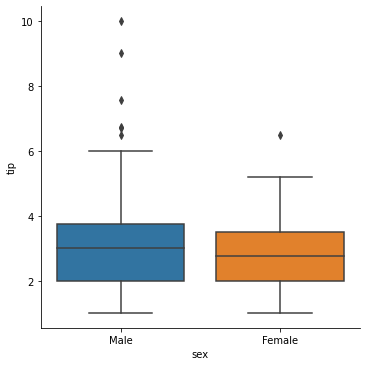

In [16]:
sns.catplot(data=tips, x='sex', y='tip', kind='box')

In [17]:
tips_male = tips[tips['sex'] == 'Male']

tips_male.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,157.0,20.744076,9.246469,7.25,14.0,18.35,24.71,50.81
tip,157.0,3.089618,1.489102,1.00,2.0,3.00,3.76,10.00
size,157.0,2.630573,0.955997,1.00,2.0,2.00,3.00,6.00


In [18]:
tips_female = tips[tips['sex'] == 'Female']

tips_female.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,87.0,18.056897,8.009209,3.07,12.75,16.40,21.52,44.3
tip,87.0,2.833448,1.159495,1.00,2.00,2.75,3.50,6.5
size,87.0,2.459770,0.937644,1.00,2.00,2.00,3.00,6.0


In [21]:
Z_cal, P_value = weightstats.ztest(x1=tips_male['tip'], x2=tips_female['tip'])

print(f"Z-Calculated: {Z_cal}")
print(f"P-Value: {P_value}")

Z-Calculated: 1.3878597054212687
P-Value: 0.1651797698624794


Now Compare P-Value with Alpha i.e 0.05.

- We notice that P-Value > Alpha, Therefore **FAIL TO REJECT** H0.

<br>
_____________________________________________________________________________________________________________________________

#### Q.) Is there any difference between Tips given in Lunch & Dinner?

- H0 : tips_lunch_mean = tips_dinner_mean
- H1 : tips_lunch_mean != tips_dinner_mean

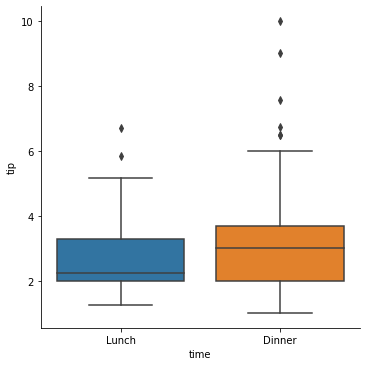

In [23]:
sns.catplot(data=tips, x='time', y='tip', kind='box')

In [24]:
tips_lunch = tips[tips['time'] == 'Lunch']

tips_lunch.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,68.0,17.168676,7.713882,7.51,12.235,15.965,19.5325,43.11
tip,68.0,2.728088,1.205345,1.25,2.000,2.250,3.2875,6.70
size,68.0,2.411765,1.040024,1.00,2.000,2.000,2.0000,6.00


In [25]:
tips_dinner = tips[tips['time'] == 'Dinner']

tips_dinner.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,176.0,20.797159,9.142029,3.07,14.4375,18.39,25.2825,50.81
tip,176.0,3.102670,1.436243,1.00,2.0000,3.00,3.6875,10.00
size,176.0,2.630682,0.910241,1.00,2.0000,2.00,3.0000,6.00


In [26]:
Z_cal, P_value = weightstats.ztest(x1=tips_lunch['tip'], x2=tips_dinner['tip'])

print(f"Z-Calculated: {Z_cal}")
print(f"P-Value: {P_value}")

Z-Calculated: -1.9062569301202392
P-Value: 0.05661687925222567


Now Compare P-Value with Alpha i.e 0.05.

- We notice that P-Value > Alpha, Therefore **FAIL TO REJECT** H0.

<br>
_____________________________________________________________________________________________________________________________